In [1]:
# Load the packages
import requests
import pandas as pd

#Import modelling libraries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import model evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix



In [2]:
df = pd.read_csv("movie_scraping_merged_cleaned.csv")
df

,title,rating,cleaned_tokens,action,adventure,animation,comedy,drama,fantasy,horror,mystery,romance,first_word
0,Puss in Boots: The Last Wish,86.0,pus boot discover passion adventure take toll ...,0,0,0,0,0,1,0,0,0,fantasy
1,M3GAN,74.0,brilliant toy company robotics use artificial ...,0,0,0,1,0,0,0,0,0,comedy
2,Avatar: The Way of Water,77.0,set decade event first film learn story sully ...,1,0,0,0,0,0,0,0,0,action
3,The Enforcer,70.0,noir thriller set miami film follow enforcer d...,0,0,0,0,1,0,0,0,0,drama
4,Devotion,74.0,harrow true story two elite u navy fighter pil...,0,0,0,0,1,0,0,0,0,drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9063,The Quiet Family,70.0,family decide buy lodge remote hike area first...,0,0,0,1,0,0,0,0,0,comedy
9064,The Naked Spur,74.0,howard kemp track killer ben long time colorad...,0,0,0,0,0,0,0,0,0,thriller
9065,Three Monkeys,72.0,family battle odds stay together small lie gro...,0,0,0,0,0,0,0,0,0,thriller
9066,Gangs of Wasseypur - Part 2,84.0,sequel final chapter bloody live avenge gang s...,0,0,0,0,0,0,0,0,0,thriller


#### Feature Extraction

In [3]:
all_words = []
for ind in df.index:
    for word in df['cleaned_tokens'][ind].split():
        all_words.append(word)
all_words

['pus',
 'boot',
 'discover',
 'passion',
 'adventure',
 'take',
 'toll',
 'burn',
 'eight',
 'nine',
 'live',
 'leave',
 'one',
 'life',
 'leave',
 'puss',
 'set',
 'epic',
 'journey',
 'find',
 'mythical',
 'last',
 'wish',
 'restore',
 'nine',
 'live',
 'brilliant',
 'toy',
 'company',
 'robotics',
 'use',
 'artificial',
 'intelligence',
 'develop',
 'man',
 'lifelike',
 'doll',
 'program',
 'emotionally',
 'bond',
 'newly',
 'orphan',
 'niece',
 'doll',
 'program',
 'work',
 'well',
 'become',
 'overprotective',
 'new',
 'friend',
 'terrify',
 'result',
 'set',
 'decade',
 'event',
 'first',
 'film',
 'learn',
 'story',
 'sully',
 'family',
 'jake',
 'kid',
 'trouble',
 'follow',
 'length',
 'go',
 'keep',
 'safe',
 'battle',
 'fight',
 'stay',
 'alive',
 'tragedy',
 'endure',
 'noir',
 'thriller',
 'set',
 'miami',
 'film',
 'follow',
 'enforcer',
 'discover',
 'femme',
 'fatale',
 'boy',
 'branch',
 'cyber',
 'sex',
 'traffic',
 'put',
 'young',
 'runaway',
 'he',
 'befriend',
 '

In [4]:
# print first 10 words
print (all_words[:10])

['pus', 'boot', 'discover', 'passion', 'adventure', 'take', 'toll', 'burn', 'eight', 'nine']


In [5]:
from nltk import FreqDist

all_words_frequency = FreqDist(all_words)
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))

<FreqDist with 15836 samples and 216496 outcomes>
[('find', 1516), ('young', 1411), ('life', 1200), ('one', 1158), ('new', 1085), ('take', 1004), ('family', 996), ('world', 947), ('live', 940), ('woman', 915)]


#### Create Word Feature using 2000 most frequently occurring words
We take 2000 most frequently occurring words as our feature.

In [6]:
# Enter code here
print (len(all_words_frequency)) 

# get 2000 frequently occuring words
most_common_words = all_words_frequency.most_common(2000)

# print the first 10 most frequently occuring words
print (most_common_words[:10])

# print the last 10 most frequently occuring words
print (most_common_words[1990:])

# the most common words list's elements are in the form of tuple get 
# only the first element of each tuple of the word list
word_features = [item[0] for item in most_common_words]
print (word_features[:10])

15836
[('find', 1516), ('young', 1411), ('life', 1200), ('one', 1158), ('new', 1085), ('take', 1004), ('family', 996), ('world', 947), ('live', 940), ('woman', 915)]
[('infect', 19), ('respect', 19), ('production', 19), ('soviet', 19), ('lucky', 19), ('hijack', 19), ('jonathan', 19), ('bird', 19), ('complication', 19), ('check', 19)]
['find', 'young', 'life', 'one', 'new', 'take', 'family', 'world', 'live', 'woman']


#### Build wordcloud for post-processed words

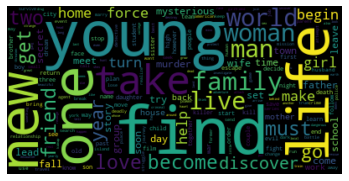

In [7]:
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(all_words_frequency)

#Plot the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
def document_features(df, stemmed_tokens):
    doc_features = []
    for index, row in df.iterrows():
        features = {}
        for word in word_features:
            # get term occurence: true if it's in the word_features, false if it's not
            features[word] = (word in row[stemmed_tokens])
        doc_features.append(features)
    return doc_features

feature_set = pd.DataFrame(document_features(df, 'cleaned_tokens'), index = df.index)
feature_set.head()

,find,young,life,one,new,take,family,world,live,woman,...,infect,respect,production,soviet,lucky,hijack,jonathan,bird,complication,check
0,True,False,True,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
import nltk
from nltk.tokenize import word_tokenize

for ind in df.index:
    df['cleaned_tokens'][ind] = word_tokenize(df['cleaned_tokens'][ind])
    
df['cleaned_tokens']

C:\Users\dtpz2\AppData\Local\Temp/ipykernel_14528/3438649059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_tokens'][ind] = word_tokenize(df['cleaned_tokens'][ind])


0       [pus, boot, discover, passion, adventure, take...
1       [brilliant, toy, company, robotics, use, artif...
2       [set, decade, event, first, film, learn, story...
3       [noir, thriller, set, miami, film, follow, enf...
4       [harrow, true, story, two, elite, u, navy, fig...
                              ...                        
9063    [family, decide, buy, lodge, remote, hike, are...
9064    [howard, kemp, track, killer, ben, long, time,...
9065    [family, battle, odds, stay, together, small, ...
9066    [sequel, final, chapter, bloody, live, avenge,...
9067    [ruby, rhett, parent, kill, car, accident, car...
Name: cleaned_tokens, Length: 9068, dtype: object

### Get TF-IDF scores to use for modelling

In [10]:
import gensim
from gensim import corpora

# Build the dictionary
mydict = corpora.Dictionary(df['cleaned_tokens'])
vocab_len = len(mydict)

def get_bow_features(df, stemmed_tokens):
    test_features = []
    for index, row in df.iterrows():
        # Converting the tokens into the format that the model requires
        features = gensim.matutils.corpus2csc([mydict.doc2bow(row[stemmed_tokens])],num_terms=vocab_len).toarray()[:,0]
        test_features.append(features)
    return test_features

header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

bow_features = pd.DataFrame(get_bow_features(df, 'cleaned_tokens'),                            
                            columns=header.split(','), index = df.index)
bow_features.head()


import gensim
from gensim import corpora
from gensim.models import TfidfModel

# Build the dictionary
mydict = corpora.Dictionary(df['cleaned_tokens'])
vocab_len = len(mydict)
corpus = [mydict.doc2bow(line) for line in df['cleaned_tokens']]
tfidf_model = TfidfModel(corpus)

def get_tfidf_features(df, stemmed_tokens):
    test_features_tfidf = []
    for index, row in df.iterrows():
        doc = mydict.doc2bow(row[stemmed_tokens])
        # Converting the tokens into the format that the model requires then adding it into bag of words
        features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
        test_features_tfidf.append(features)
    return test_features_tfidf

header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

tfidf_features = pd.DataFrame(get_tfidf_features(df, 'cleaned_tokens'),                            
                            columns=header.split(','), index = df.index)
tfidf_features.head()

,adventure,boot,burn,discover,eight,epic,find,journey,last,leave,...,rayborn,columbia,char,granddad,naively,invalidate,sardar,sighs,malibu,rhett
0,0.145773,0.257551,0.21804,0.094660,0.208049,0.179085,0.069211,0.138168,0.142998,0.226746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.00000,0.088879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Data Balancing: Oversample
Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset.
The advantage of oversampling is that no information from the original training set is lost since we keep all members from the minority and majority classes. However, the disadvantage is that we greatly increase the size of the training set.

In [11]:
#counts of positive and negative sentiment
df['first_word'].value_counts()

thriller     1894
drama        1733
romance      1111
comedy       1017
horror        872
fantasy       815
mystery       781
action        468
adventure     377
Name: first_word, dtype: int64

Text(0.5, 0, 'Genre')

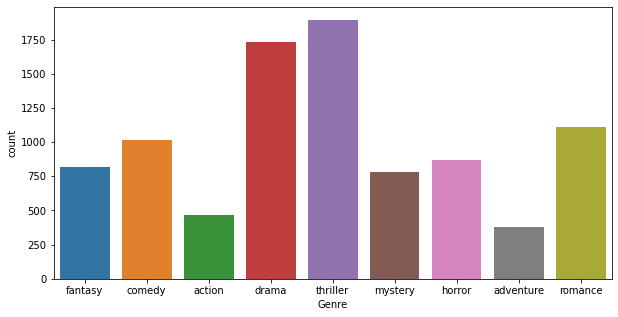

In [12]:
#Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Plot bar graph for 'sentiment' column
plt.figure(figsize=(10, 5))

#Define data
sns.countplot(data=df, x='first_word')
plt.xlabel('Genre')

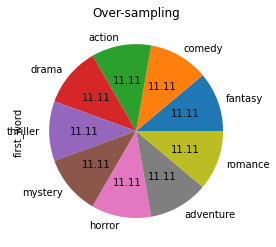

In [13]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(['first_word'], axis=1)
y = df['first_word']
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

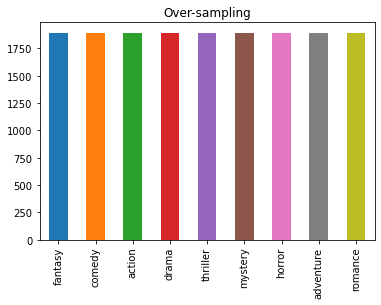

In [14]:
ax = y_res.value_counts().plot.bar(color=sns.color_palette())
_ = ax.set_title("Over-sampling")

In [15]:
# Class distribution
y_res.value_counts() 

fantasy      1894
comedy       1894
action       1894
drama        1894
thriller     1894
mystery      1894
horror       1894
adventure    1894
romance      1894
Name: first_word, dtype: int64

All genres are balanced.

#### Create Train and Test Dataset (using TFIDF)

In [16]:
from sklearn.model_selection import train_test_split
X = tfidf_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##  Modelling for genre tagging system (DT, RF, KNC, GB, LR, GNB) 

In [17]:
#Import modelling libraries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import model evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

### Model 1: Decision Tree Model

In [18]:
from sklearn.naive_bayes import GaussianNB

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# classification report
print(classification_report(y_test, classifier.predict(X_test)))

# accuracy score
y_pred = classifier.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

      action       0.15      0.12      0.13        94
   adventure       0.14      0.08      0.10        75
      comedy       0.21      0.17      0.18       204
       drama       0.28      0.36      0.32       347
     fantasy       0.24      0.20      0.22       163
      horror       0.23      0.23      0.23       174
     mystery       0.29      0.21      0.24       156
     romance       0.34      0.38      0.36       222
    thriller       0.33      0.36      0.34       379

    accuracy                           0.28      1814
   macro avg       0.24      0.23      0.24      1814
weighted avg       0.27      0.28      0.27      1814

Accuracy Score: 0.27618522601984563


<AxesSubplot:>

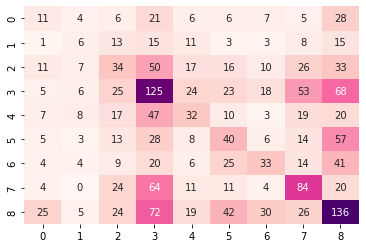

In [19]:
DT_matrix = confusion_matrix(y_test, y_pred)
DT_matrix= pd.DataFrame(DT_matrix)
sns.heatmap(DT_matrix, annot=True, fmt='g', cmap='RdPu', cbar=False)

### Model 2: Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

# classification report
print(classification_report(y_test, lr.predict(X_test)))

# accuracy score
log_y_pred = lr.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, log_y_pred)))

C:\Users\dtpz2\Documents\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dtpz2\Documents\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dtpz2\Documents\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.00      0.00      0.00        94
   adventure       0.00      0.00      0.00        75
      comedy       0.29      0.19      0.23       204
       drama       0.34      0.56      0.42       347
     fantasy       0.44      0.24      0.31       163
      horror       0.32      0.14      0.20       174
     mystery       0.50      0.10      0.16       156
     romance       0.48      0.41      0.44       222
    thriller       0.36      0.67      0.47       379

    accuracy                           0.36      1814
   macro avg       0.30      0.26      0.25      1814
weighted avg       0.34      0.36      0.32      1814

Accuracy Score: 0.3627342888643881


<AxesSubplot:>

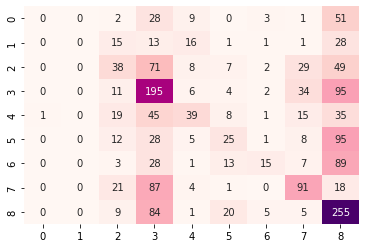

In [21]:
LR_matrix = confusion_matrix(y_test, log_y_pred)
LR_matrix= pd.DataFrame(LR_matrix)
sns.heatmap(LR_matrix, annot=True, fmt='g', cmap='RdPu', cbar=False)

### Model 3: Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

# classification report
print(classification_report(y_test, rfc.predict(X_test)))

# accuracy score
rfc_y_pred = rfc.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, rfc_y_pred)))

              precision    recall  f1-score   support

      action       0.19      0.05      0.08        94
   adventure       0.10      0.04      0.06        75
      comedy       0.22      0.22      0.22       204
       drama       0.31      0.48      0.38       347
     fantasy       0.32      0.21      0.26       163
      horror       0.30      0.17      0.21       174
     mystery       0.34      0.19      0.24       156
     romance       0.38      0.38      0.38       222
    thriller       0.34      0.46      0.39       379

    accuracy                           0.31      1814
   macro avg       0.28      0.24      0.25      1814
weighted avg       0.30      0.31      0.30      1814

Accuracy Score: 0.31367144432194044


<AxesSubplot:>

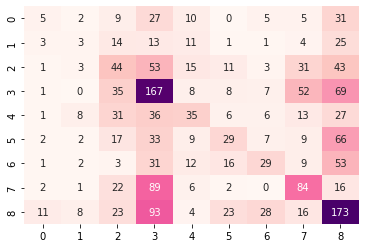

In [23]:
rfc_matrix = confusion_matrix(y_test, rfc_y_pred)
rfc_matrix= pd.DataFrame(rfc_matrix)
sns.heatmap(rfc_matrix, annot=True, fmt='g', cmap='RdPu', cbar=False)

### Model 4: K Neighbors Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

# classification report
print(classification_report(y_test, knc.predict(X_test)))

# accuracy score
knc_y_pred = knc.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, knc_y_pred)))

              precision    recall  f1-score   support

      action       0.07      0.10      0.08        94
   adventure       0.16      0.16      0.16        75
      comedy       0.23      0.25      0.24       204
       drama       0.31      0.37      0.34       347
     fantasy       0.29      0.23      0.26       163
      horror       0.19      0.18      0.19       174
     mystery       0.22      0.22      0.22       156
     romance       0.38      0.33      0.35       222
    thriller       0.34      0.31      0.32       379

    accuracy                           0.27      1814
   macro avg       0.24      0.24      0.24      1814
weighted avg       0.28      0.27      0.27      1814

Accuracy Score: 0.27122381477398017


<AxesSubplot:>

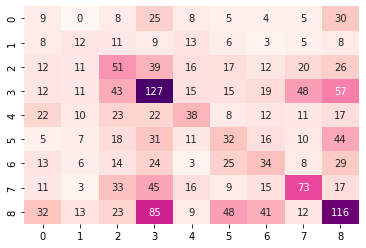

In [25]:
knc_matrix = confusion_matrix(y_test, knc_y_pred)
knc_matrix= pd.DataFrame(knc_matrix)
sns.heatmap(knc_matrix, annot=True, fmt='g', cmap='RdPu', cbar=False)

### Model 5: Gradient Boosting Model

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# classification report
print(classification_report(y_test, gbc.predict(X_test)))

# accuracy score
gbc_y_pred = gbc.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, gbc_y_pred)))

              precision    recall  f1-score   support

      action       0.10      0.03      0.05        94
   adventure       0.13      0.08      0.10        75
      comedy       0.30      0.12      0.17       204
       drama       0.30      0.48      0.37       347
     fantasy       0.34      0.18      0.23       163
      horror       0.26      0.13      0.17       174
     mystery       0.31      0.14      0.19       156
     romance       0.39      0.41      0.40       222
    thriller       0.33      0.54      0.41       379

    accuracy                           0.32      1814
   macro avg       0.27      0.24      0.23      1814
weighted avg       0.30      0.32      0.29      1814

Accuracy Score: 0.3153252480705623


<AxesSubplot:>

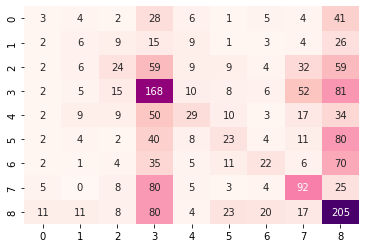

In [27]:
gbc_matrix = confusion_matrix(y_test, gbc_y_pred)
gbc_matrix= pd.DataFrame(gbc_matrix)
sns.heatmap(gbc_matrix, annot=True, fmt='g', cmap='RdPu', cbar=False)

## Evaluation

#### Measure model performance using accuracy 

In [28]:
from sklearn.metrics import accuracy_score
print("--------Compare accuracy scores--------")
print("Decision Tree Model:", accuracy_score(y_test, y_pred))
print("Logistic Regression Model:", accuracy_score(y_test, log_y_pred))
print("Random Forest Model:", accuracy_score(y_test, rfc_y_pred))
print("KNeighbors Model:", accuracy_score(y_test, knc_y_pred))
print("Gradient Boosting Model:", accuracy_score(y_test, gbc_y_pred))

--------Compare accuracy scores--------
Decision Tree Model: 0.27618522601984563
Logistic Regression Model: 0.3627342888643881
Random Forest Model: 0.31367144432194044
KNeighbors Model: 0.27122381477398017
Gradient Boosting Model: 0.3153252480705623


### Best Model: Logistic Regression

### Feature Selection

Only select features above a certain threshold of feature importance, in this case, 0.02

In [29]:
modelChosen = lr.fit(X_train, y_train)
importance = modelChosen.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.17870
Feature: 1, Score: -0.07779
Feature: 2, Score: -0.16104
Feature: 3, Score: -0.41875
Feature: 4, Score: -0.13429
Feature: 5, Score: 0.05183
Feature: 6, Score: -0.42124
Feature: 7, Score: -0.26246
Feature: 8, Score: -0.07235
Feature: 9, Score: -0.18144
Feature: 10, Score: -0.80658
Feature: 11, Score: -0.47404
Feature: 12, Score: -0.19388
Feature: 13, Score: -0.20912
Feature: 14, Score: -0.09633
Feature: 15, Score: -0.22162
Feature: 16, Score: -0.04197
Feature: 17, Score: -0.00907
Feature: 18, Score: -0.12259
Feature: 19, Score: 0.35350
Feature: 20, Score: 0.71749
Feature: 21, Score: 0.07665
Feature: 22, Score: -0.16945
Feature: 23, Score: -0.12469
Feature: 24, Score: -0.00486
Feature: 25, Score: 0.24062
Feature: 26, Score: -0.19694
Feature: 27, Score: 0.09155
Feature: 28, Score: -0.32782
Feature: 29, Score: -0.26010
Feature: 30, Score: -0.11252
Feature: 31, Score: -0.56216
Feature: 32, Score: 0.36992
Feature: 33, Score: -0.06028
Feature: 34, Score: 0.23090
Fea

Feature: 2224, Score: 0.06881
Feature: 2225, Score: -0.18594
Feature: 2226, Score: -0.02586
Feature: 2227, Score: -0.02586
Feature: 2228, Score: -0.36558
Feature: 2229, Score: -0.24904
Feature: 2230, Score: -0.05538
Feature: 2231, Score: -0.25065
Feature: 2232, Score: 0.04033
Feature: 2233, Score: 0.00000
Feature: 2234, Score: -0.09567
Feature: 2235, Score: -0.00824
Feature: 2236, Score: 0.00044
Feature: 2237, Score: 0.19344
Feature: 2238, Score: -0.07190
Feature: 2239, Score: 0.00000
Feature: 2240, Score: -0.14137
Feature: 2241, Score: -0.01191
Feature: 2242, Score: 0.04317
Feature: 2243, Score: 0.00000
Feature: 2244, Score: 0.16924
Feature: 2245, Score: -0.39035
Feature: 2246, Score: 0.05451
Feature: 2247, Score: 0.17912
Feature: 2248, Score: 0.43936
Feature: 2249, Score: -0.02182
Feature: 2250, Score: -0.05172
Feature: 2251, Score: -0.12688
Feature: 2252, Score: -0.21121
Feature: 2253, Score: 0.46706
Feature: 2254, Score: -0.09641
Feature: 2255, Score: -0.06265
Feature: 2256, Score:

Feature: 3144, Score: -0.00929
Feature: 3145, Score: 0.39705
Feature: 3146, Score: -0.04415
Feature: 3147, Score: 0.33499
Feature: 3148, Score: 0.11920
Feature: 3149, Score: 0.22277
Feature: 3150, Score: 0.30084
Feature: 3151, Score: 0.06159
Feature: 3152, Score: 0.09591
Feature: 3153, Score: 0.17506
Feature: 3154, Score: 0.12199
Feature: 3155, Score: 0.42988
Feature: 3156, Score: 0.15434
Feature: 3157, Score: -0.02464
Feature: 3158, Score: -0.02464
Feature: 3159, Score: -0.16627
Feature: 3160, Score: -0.04247
Feature: 3161, Score: -0.03306
Feature: 3162, Score: -0.03730
Feature: 3163, Score: -0.08542
Feature: 3164, Score: -0.03980
Feature: 3165, Score: -0.00864
Feature: 3166, Score: -0.04875
Feature: 3167, Score: -0.04443
Feature: 3168, Score: -0.01979
Feature: 3169, Score: -0.01998
Feature: 3170, Score: -0.16527
Feature: 3171, Score: 0.33827
Feature: 3172, Score: -0.08752
Feature: 3173, Score: -0.03166
Feature: 3174, Score: -0.03039
Feature: 3175, Score: -0.05871
Feature: 3176, Score

Feature: 5223, Score: 0.06430
Feature: 5224, Score: -0.08558
Feature: 5225, Score: -0.08638
Feature: 5226, Score: -0.05482
Feature: 5227, Score: -0.09091
Feature: 5228, Score: -0.12013
Feature: 5229, Score: -0.02448
Feature: 5230, Score: -0.03086
Feature: 5231, Score: -0.11783
Feature: 5232, Score: -0.02014
Feature: 5233, Score: -0.02702
Feature: 5234, Score: 0.43800
Feature: 5235, Score: -0.09203
Feature: 5236, Score: -0.05004
Feature: 5237, Score: -0.15524
Feature: 5238, Score: -0.01719
Feature: 5239, Score: -0.02718
Feature: 5240, Score: -0.01364
Feature: 5241, Score: -0.16795
Feature: 5242, Score: 0.18374
Feature: 5243, Score: 0.38863
Feature: 5244, Score: 0.11426
Feature: 5245, Score: 0.32520
Feature: 5246, Score: -0.03983
Feature: 5247, Score: -0.12146
Feature: 5248, Score: 0.15074
Feature: 5249, Score: 0.50011
Feature: 5250, Score: 0.01528
Feature: 5251, Score: 0.24865
Feature: 5252, Score: 0.25325
Feature: 5253, Score: 0.30013
Feature: 5254, Score: 0.01834
Feature: 5255, Score:

Feature: 7722, Score: -0.10133
Feature: 7723, Score: -0.13858
Feature: 7724, Score: -0.07730
Feature: 7725, Score: -0.03298
Feature: 7726, Score: -0.02651
Feature: 7727, Score: -0.08254
Feature: 7728, Score: -0.00919
Feature: 7729, Score: -0.04506
Feature: 7730, Score: -0.18009
Feature: 7731, Score: -0.04211
Feature: 7732, Score: -0.06399
Feature: 7733, Score: -0.07177
Feature: 7734, Score: -0.03978
Feature: 7735, Score: -0.02392
Feature: 7736, Score: -0.06957
Feature: 7737, Score: -0.01670
Feature: 7738, Score: -0.01670
Feature: 7739, Score: -0.02368
Feature: 7740, Score: -0.05305
Feature: 7741, Score: 0.09478
Feature: 7742, Score: -0.01718
Feature: 7743, Score: -0.01718
Feature: 7744, Score: -0.01718
Feature: 7745, Score: -0.02640
Feature: 7746, Score: -0.02567
Feature: 7747, Score: -0.02689
Feature: 7748, Score: -0.02298
Feature: 7749, Score: -0.05488
Feature: 7750, Score: -0.04378
Feature: 7751, Score: -0.04542
Feature: 7752, Score: -0.04419
Feature: 7753, Score: -0.03418
Feature: 

Feature: 10222, Score: -0.02877
Feature: 10223, Score: -0.01815
Feature: 10224, Score: -0.02242
Feature: 10225, Score: -0.01469
Feature: 10226, Score: -0.02938
Feature: 10227, Score: -0.04407
Feature: 10228, Score: -0.01469
Feature: 10229, Score: -0.07658
Feature: 10230, Score: 0.30893
Feature: 10231, Score: -0.05231
Feature: 10232, Score: -0.00989
Feature: 10233, Score: -0.01070
Feature: 10234, Score: -0.02424
Feature: 10235, Score: -0.01070
Feature: 10236, Score: -0.05533
Feature: 10237, Score: -0.01000
Feature: 10238, Score: -0.01670
Feature: 10239, Score: -0.01000
Feature: 10240, Score: -0.02168
Feature: 10241, Score: -0.09536
Feature: 10242, Score: -0.04258
Feature: 10243, Score: -0.04659
Feature: 10244, Score: -0.01000
Feature: 10245, Score: -0.01000
Feature: 10246, Score: -0.01348
Feature: 10247, Score: -0.01348
Feature: 10248, Score: -0.04051
Feature: 10249, Score: -0.04509
Feature: 10250, Score: -0.01866
Feature: 10251, Score: -0.02372
Feature: 10252, Score: -0.02372
Feature: 

Feature: 12350, Score: -0.01570
Feature: 12351, Score: -0.00804
Feature: 12352, Score: -0.00870
Feature: 12353, Score: -0.04349
Feature: 12354, Score: -0.02013
Feature: 12355, Score: -0.02301
Feature: 12356, Score: -0.03282
Feature: 12357, Score: -0.01643
Feature: 12358, Score: -0.01643
Feature: 12359, Score: -0.03166
Feature: 12360, Score: 0.26977
Feature: 12361, Score: -0.04062
Feature: 12362, Score: 0.00000
Feature: 12363, Score: -0.01152
Feature: 12364, Score: 0.00000
Feature: 12365, Score: -0.01714
Feature: 12366, Score: -0.03074
Feature: 12367, Score: 0.21191
Feature: 12368, Score: 0.21996
Feature: 12369, Score: 0.21471
Feature: 12370, Score: 0.47332
Feature: 12371, Score: -0.01616
Feature: 12372, Score: 0.00000
Feature: 12373, Score: 0.00000
Feature: 12374, Score: 0.00000
Feature: 12375, Score: 0.00000
Feature: 12376, Score: 0.00000
Feature: 12377, Score: 0.17499
Feature: 12378, Score: 0.00000
Feature: 12379, Score: -0.02465
Feature: 12380, Score: -0.01793
Feature: 12381, Score:

Feature: 15015, Score: -0.03045
Feature: 15016, Score: -0.01523
Feature: 15017, Score: -0.01523
Feature: 15018, Score: -0.01814
Feature: 15019, Score: -0.02502
Feature: 15020, Score: -0.01562
Feature: 15021, Score: -0.01562
Feature: 15022, Score: -0.04627
Feature: 15023, Score: -0.01472
Feature: 15024, Score: -0.01472
Feature: 15025, Score: 0.00000
Feature: 15026, Score: -0.05280
Feature: 15027, Score: -0.01315
Feature: 15028, Score: -0.02929
Feature: 15029, Score: -0.02929
Feature: 15030, Score: -0.02853
Feature: 15031, Score: -0.02853
Feature: 15032, Score: 0.00000
Feature: 15033, Score: 0.00000
Feature: 15034, Score: -0.01561
Feature: 15035, Score: -0.01690
Feature: 15036, Score: -0.01690
Feature: 15037, Score: -0.01146
Feature: 15038, Score: -0.01146
Feature: 15039, Score: -0.01391
Feature: 15040, Score: 0.00000
Feature: 15041, Score: 0.00000
Feature: 15042, Score: 0.00000
Feature: 15043, Score: 0.00000
Feature: 15044, Score: 0.00000
Feature: 15045, Score: -0.01526
Feature: 15046, 

In [30]:
features = X_train.columns

In [31]:
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': importance})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

print(coef_df)

         Feature  Coefficient
5031     martial     1.641837
312        world     1.607910
131         team     1.594854
1327       alien     1.532583
1946  government     1.521068
...          ...          ...
80          girl    -0.888925
94         young    -1.084954
193         town    -1.123685
682        woman    -1.195701
1189        love    -1.280874

[15817 rows x 2 columns]


In [32]:
# Create a variable features_weight, containing the name of the feature and the 
# corresponding weight the best model found in Q5 above. 
features_weight = list(zip(features, coef_df['Coefficient']))
features_weight

[('adventure', 1.6418369976045835),
 ('boot', 1.6079100874813872),
 ('burn', 1.5948538080546435),
 ('discover', 1.53258254265745),
 ('eight', 1.521068494096373),
 ('epic', 1.4971311600748458),
 ('find', 1.4584653377414434),
 ('journey', 1.3692206836574488),
 ('last', 1.3300273192621843),
 ('leave', 1.2689510171357292),
 ('life', 1.259716805020716),
 ('live', 1.2408282421369592),
 ('mythical', 1.1785392974722633),
 ('nine', 1.1742478426843155),
 ('one', 1.1664576176143975),
 ('passion', 1.1117311275179045),
 ('pus', 1.0763737223444085),
 ('puss', 1.0558296914408654),
 ('restore', 1.0552681614048887),
 ('set', 1.0531241333484713),
 ('take', 1.0481113628960732),
 ('toll', 1.035239062776826),
 ('wish', 1.033973202784178),
 ('artificial', 1.029957095121312),
 ('become', 1.0286731022111264),
 ('bond', 1.0260284747609405),
 ('brilliant', 1.0202325058203785),
 ('company', 1.017591639554805),
 ('develop', 1.011778045756412),
 ('doll', 0.9863912902734637),
 ('emotionally', 0.9672036000078432),
 

#### Select features of weight more than 0.02


In [33]:
selectedFeatures = []

for item in features_weight:
    if item[1] > 0.02:
        selectedFeatures.append(item)
    
selectedFeatures

[('adventure', 1.6418369976045835),
 ('boot', 1.6079100874813872),
 ('burn', 1.5948538080546435),
 ('discover', 1.53258254265745),
 ('eight', 1.521068494096373),
 ('epic', 1.4971311600748458),
 ('find', 1.4584653377414434),
 ('journey', 1.3692206836574488),
 ('last', 1.3300273192621843),
 ('leave', 1.2689510171357292),
 ('life', 1.259716805020716),
 ('live', 1.2408282421369592),
 ('mythical', 1.1785392974722633),
 ('nine', 1.1742478426843155),
 ('one', 1.1664576176143975),
 ('passion', 1.1117311275179045),
 ('pus', 1.0763737223444085),
 ('puss', 1.0558296914408654),
 ('restore', 1.0552681614048887),
 ('set', 1.0531241333484713),
 ('take', 1.0481113628960732),
 ('toll', 1.035239062776826),
 ('wish', 1.033973202784178),
 ('artificial', 1.029957095121312),
 ('become', 1.0286731022111264),
 ('bond', 1.0260284747609405),
 ('brilliant', 1.0202325058203785),
 ('company', 1.017591639554805),
 ('develop', 1.011778045756412),
 ('doll', 0.9863912902734637),
 ('emotionally', 0.9672036000078432),
 

In [34]:
len(selectedFeatures)

2678

In [35]:
selectedFeatureNames = [feature[0] for feature in selectedFeatures]
print(selectedFeatureNames)

['adventure', 'boot', 'burn', 'discover', 'eight', 'epic', 'find', 'journey', 'last', 'leave', 'life', 'live', 'mythical', 'nine', 'one', 'passion', 'pus', 'puss', 'restore', 'set', 'take', 'toll', 'wish', 'artificial', 'become', 'bond', 'brilliant', 'company', 'develop', 'doll', 'emotionally', 'friend', 'intelligence', 'lifelike', 'man', 'new', 'newly', 'niece', 'orphan', 'overprotective', 'program', 'result', 'robotics', 'terrify', 'toy', 'use', 'well', 'work', 'alive', 'battle', 'decade', 'endure', 'event', 'family', 'fight', 'film', 'first', 'follow', 'go', 'jake', 'keep', 'kid', 'learn', 'length', 'safe', 'stay', 'story', 'sully', 'tragedy', 'trouble', 'befriend', 'boy', 'branch', 'build', 'cyber', 'deadly', 'enforcer', 'everything', 'fatale', 'femme', 'girl', 'he', 'miami', 'noir', 'organization', 'put', 'risk', 'runaway', 'sacrifice', 'save', 'sex', 'spend', 'thriller', 'traffic', 'young', 'celebrate', 'elite', 'fighter', 'harrow', 'heroic', 'korean', 'make', 'navy', 'pilot', 't

#### Use only the selected features to train a new Logistic Regression model


## Model 6: Logistic Regression + Feature Selection

In [36]:
X_train_selected = X_train[selectedFeatureNames]

# Train a new model using the selected features
lr_selected = LogisticRegression(solver='liblinear')
lr_selected.fit(X_train_selected, y_train)

# Predict the classes of the test set
y_pred_feature_select = lr_selected.predict(X_test[selectedFeatureNames])

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_feature_select)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.35556780595369347


## Conclusion (best model): 
The accuracy score decreased from 0.3627342888643881 to 0.35556780595369347 after applying feature selection. 

### **Model 2 (Logistic Regression) remains as the best model with highest accuracy.**

## Recommendations
- Increase the number of Action and Adventure movie data to increase the precision of these two genres as they are 0.00. 
- Increase dataset size and perform undersampling instead of oversampling to increase model accuracy.

# Movie Recommendation System
There are many ways to build a Movie Recommendation System. Here are some I have considered.
1. **Content-Based**: The Content-Based Recommender relies on the similarity of the movies being recommended. If you like a movie, then you will also like a “similar” movie and it will be recommended to you. (utilize Cosine Similarity scores)
2. **Collaborative Filtering**: It analyses how similar the tastes of one user is to another and makes movie recommendations on the basis of that.
3. **Deep Learning**: Creates a model to learn the values of embedding matrix. The user latent features and movie latent features are looked up from the embedding matrices for specific movie-user combination.
4. **Item and Genre-based recommender**: It is a similar to Content-Based Recommender as it also relies on the similarity of the movies being recommended, but with an additional parameter to take in the genre of a movie. Results are filtered by genre, increasing the accuracy of recommended movies.

### Item and Genre-based recommender
The reason why I chose this Item and Genre-based recommender is because I do not have individual user rating data for Collaborative Filtering (e.g. For instance, if user A likes movies 1, 2, 3 and user B likes movies 2,3,4, then they have similar interests and A should like movie 4 and B should like movie 1.) but only have the individual movie data and their ratings. The Item and Genre-based recommender will recommend users 10 other movies based on the movie they inputted (a movie they enjoyed previously) as well as its genre. This way, the movie recommender system will return 10 other movies which have the highest similarity scores based on cosine similarity to the user, and further filter the movies into the same genre as the inputted genre, making the results more accurate and the experience to be enjoyable to the user.

#### Print shape of tfidf

In [37]:
tfidf_features.shape

(9068, 15817)

#### Calculate the cosine similarity between all the movies

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(tfidf_features)

### Defining the function to get movie recommendations based on user input

In [39]:
def get_recom(title, genre):
    # Get movie index from the inputted title
    idx = df[(df['title'] == title) & (df['first_word'] == genre)].index[0]

    # Get the pairwise similarity scores of all movies with the inputted movie
    sim_scores = list(enumerate(cosine_similarity[idx]))

    # Sort all the movies based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar movies in the same genre
    sim_scores = [i for i in sim_scores if df.iloc[i[0]]['first_word'] == genre]
    sim_scores = sim_scores[1:11]

    # Return the movies' title & similarity scores of the 10 most similar movies in the same genre as inputted movie
    return [(df['title'].iloc[i[0]], i[1], df['rating'].iloc[i[0]]) for i in sim_scores]

### Testing

#### Input test data from df

In [42]:
recom_movies = get_recom('Percy Jackson: Sea of Monsters', 'fantasy')
recom_movies

[('Percy Jackson: Sea of Monsters', 0.5064854559313621, 57.0),
 ('Gods of Egypt', 0.27044183900528646, 56.0),
 ('Hellboy II: The Golden Army', 0.25693679618618326, 70.0),
 ('Gedo senki', 0.23703760455268594, 63.0),
 ('Lara Croft Tomb Raider: The Cradle of Life', 0.22595816452218043, 55.0),
 ('Jason and the Argonauts', 0.16803665013529057, 71.0),
 ('Over the Moon', 0.15519434546264885, 73.0),
 ('Pokémon the Movie: Hoopa and the Clash of Ages', 0.14179212033806698, 68.0),
 ('The Addams Family', 0.13577925454573345, 69.0),
 ('The Secret of Kells', 0.1323215906384178, 74.0)]

In [43]:
print('Here are some movies you will definitely enjoy!')
print('----------------------------------------------------')
print('      Title      |', '    Rating      |', '   Similarity %')
print('----------------------------------------------------')

index=1
for item in recom_movies:
    print(index,':', item[0], ',', item[2], ',', item[1]*100)
    index+=1

Here are some movies you will definitely enjoy!
----------------------------------------------------
      Title      |     Rating      |    Similarity %
----------------------------------------------------
1 : Percy Jackson: Sea of Monsters , 57.0 , 50.648545593136205
2 : Gods of Egypt , 56.0 , 27.044183900528644
3 : Hellboy II: The Golden Army , 70.0 , 25.693679618618326
4 : Gedo senki , 63.0 , 23.703760455268593
5 : Lara Croft Tomb Raider: The Cradle of Life , 55.0 , 22.595816452218042
6 : Jason and the Argonauts , 71.0 , 16.803665013529056
7 : Over the Moon , 73.0 , 15.519434546264884
8 : Pokémon the Movie: Hoopa and the Clash of Ages , 68.0 , 14.1792120338067
9 : The Addams Family , 69.0 , 13.577925454573345
10 : The Secret of Kells , 74.0 , 13.232159063841781


As seen in the results, all the movies returned are of 'fantasy' genre. 
The most recommended movie is another Percy Jackson movie, *Percy Jackson: Sea of Monsters*, with similarity score of 0.506. This is expected as it is the sequel to the inputted movie, thus they have many words in common.
The next recommended movie is *Hellboy II: The Golden Army*. This movie has some words in common with the inputted movie, such as 'mythical' and 'quest'. This is why the similarity score is higher in contrast to the rest of the movies below, a 0.270 similarity score.

The results shows that the recommendation system is working. I have also included user rating score for the user to make a easier decision. 

### Reflection

Although the recommendation system is working, and relevant movies are being recommended to users, there are some constraints that this system possess. 
Firstly, before inputting the genre, users have to have to check in the dataframe directly which genre the movie belongs to, as it is not by default the first genre found on the website. This is due to the web scraping step, where movies were scraped by genres, however, the movie's main genre may not be the genre filtered. This causes the first genre in the 'genres' column to not be the main genre, and it did not capture the accuracy of movies' genre. This directly impacted the models' accuracy as well as the Movie Recommendation System, which ultimately led to slight inaccuracy of movies being recommended having the genre indicated as a sub-genre instead of its main genre. However, we could not counter the problem as long as each movie has more than 1 genre. 
Secondly, I used the oversampling method because the undersampling the data would lead to each of the 9 genres having only 500+ records, which will not benefit the models' accuracy. This led to duplicates of movies being added to boost the data. When returning the top 10 recommended movies, duplicates can be seen, although rarely. This is an inevitable problem with the current unbalanced dataset. 
In conclusion, this project's objective of the creation of a movie tagging as well as movie recommendation system were met, and lastly the automation of movie taggers or movie recommenders. 